<a href="https://colab.research.google.com/github/kevalbotadra/Chess-EDA-and-Winner-Prediction/blob/main/Boston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Neccesary Models

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

import statsmodels.formula.api as smf

sns.set()

Read in the dataset with the appropriate columns

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Exploratory Data Analysis



Generate a covariance matrix (correlation heatmap) for every variable in the dataset

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm') #Orignial Heatmap with no transformations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Generate and explore an exponential model of the MEDV data




In [ ]:
data['Exponential_Model'] = np.log10(data['MEDV'])
data

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Exponential_Model
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.527946
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.363344
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.541556
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.158412
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.510600
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.632021
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.453422
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.342780
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.481971
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.561466


In [ ]:
data = data.drop(columns=['Exponential_Model'])

Generate and Explore a logarithmic model of the RM data


In [ ]:
data['Log_Model'] = np.log10(data['RM'])
data

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Log_Model
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.233491
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.309427
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.394438
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.083886
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.316080
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.993428
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.253861
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.224217
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.222377
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.300763


In [ ]:
data = data.drop(columns=['Log_Model'])

Generate and explore a power model of both the RM and MEDV

In [ ]:
data['Log_RM'] = np.log10(data['RM'])
data['Log_MEDV'] = np.log10(data['MEDV'])
data

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Log_RM,Log_MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.233491,-0.527946
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.309427,0.363344
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.394438,-0.541556
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.083886,0.158412
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.316080,-0.510600
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.993428,0.632021
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.253861,-0.453422
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.224217,0.342780
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.222377,-0.481971
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.300763,-0.561466


In [ ]:
data = data.drop(columns=['Log_RM'])
data = data.drop(columns=['Log_MEDV'])

Create a basic scatterplot depicting the relationship between RM and MEDV

Text(0.5, 1.0, 'RM vs MEDV')

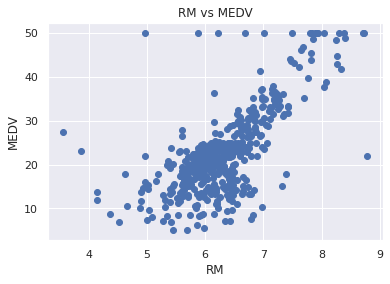

In [ ]:
plt.scatter(x=data["RM"], y=data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("RM vs MEDV")

Create a least squares regression lines and plot it on the scatterplot

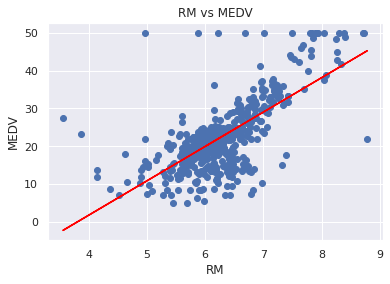

In [ ]:
m, b = np.polyfit(data["RM"], data["MEDV"], 1)
plt.scatter(x=data["RM"], y=data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("RM vs MEDV")
plt.plot(data["RM"], m*data["RM"] + b, color="red")

# Model Creation and Analysis

Generate the least squares regression line computer output model to interpret the variables

In [ ]:
X = data["RM"]
Y = data["MEDV"]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 21 May 2022   Prob (F-statistic):           2.49e-74
Time:                        14:13:45   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Use the model to predict the RM column and create a residual plot

Text(0, 0.5, 'Residuals')

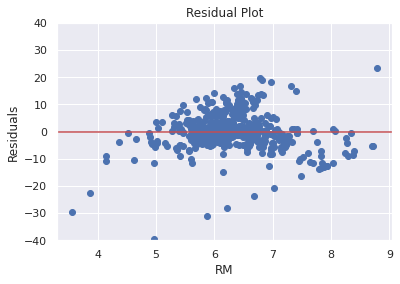

In [ ]:
y_pred = model.predict(X)
plt.scatter(x=data["RM"], y=y_pred - Y)
plt.axhline(y=0, color='r', linestyle='-')
plt.ylim(-40, 40)
plt.title("Residual Plot")
plt.xlabel("RM")
plt.ylabel("Residuals")

Determine the mean and standard deviation of both columns

In [ ]:
rmMean = np.mean(data["RM"])
rmStd = np.std(data["RM"])

medvMean = np.mean(data["MEDV"])
medvStd = np.std(data["MEDV"])

print("RM mean: " + rmMean)
print("RM standard deviation: " + rmStd)
print("MEDV mean: " + medvMean)
print("MEDV standard deviation: " + medvStd)

6.284634387351787
0.7019225143345692
22.532806324110698
9.188011545278206


Find the min and max values in the RM (x) column

In [ ]:
print(np.amin(data["RM"]))
print(np.amax(data["RM"]))

3.561
8.78


Check if a specific data point is in the RM column

In [ ]:
print(4.67 in data["RM"].values)

False


Use the Mahalanobis distance method to detect outliers in our bivariate data

In [ ]:
from scipy.stats import chi2
import scipy as sp
def mahalanobis_method(df):
    x_minus_mu = df - np.mean(df) # subtract the mean from each data 
    cov = np.cov(df.values.T) # construct a covariance matrix of the df values                       
    inv_covmat = sp.linalg.inv(cov) # obtain the inverse of the covariance matrix
    left_term = np.dot(x_minus_mu, inv_covmat) # first part of the matrix multiplication
    mahal = np.dot(left_term, x_minus_mu.T) # second part of the matrix multiplication
    md = np.sqrt(mahal.diagonal()) # obtain a metric
    
    
    outlier = []
    
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1])) # it has been shown that under the mutlivariate normal distribution, md follows a Chi-Square distribution with K degrees of freedom
    # We use alpha = 0.001 to find the cutoff value past which we declare outliers. 
    for index, value in enumerate(md):
        if value > C: # if the value is outside the cutoff
            outlier.append(index)
        else:
            continue
    return outlier, md

In [ ]:
outliers_mahal_bi, md_bi = mahalanobis_method(df=data[["RM", "MEDV"]])
outliers_mahal_bi

[364, 365, 367, 368, 371, 372]

Display the outliers on our RM vs MEDV correlation graph

Text(0.5, 1.0, 'RM vs MEDV')

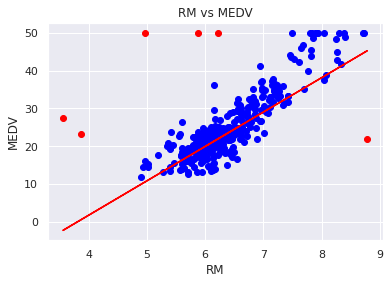

In [ ]:
plt.scatter(x=data["RM"][0:364], y=data["MEDV"][0:364], c="blue")
plt.scatter(x=data["RM"][364:366], y=data["MEDV"][364:366], c="red")
plt.scatter(x=data["RM"][367:369], y=data["MEDV"][367:369], c="red")
plt.scatter(x=data["RM"][371:373], y=data["MEDV"][371:373], c="red")
m, b = np.polyfit(data["RM"], data["MEDV"], 1)
plt.plot(data["RM"], m*data["RM"] + b, color="red")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("RM vs MEDV")

Create a multivariate regression model using all data columns to predict the MEDV 

In [ ]:
Y = data["MEDV"]
data.pop("MEDV")

X = data

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 21 May 2022   Prob (F-statistic):          6.72e-135
Time:                        14:13:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Boston Housing Dataset.ipynb')

--2022-05-22 16:04:00--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-22 16:04:00 (26.5 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Boston Housing Dataset.ipynb to pdf
[NbConvertApp] Support files will be in Boston Housing Dataset_files/
[NbConvertApp] Making directory ./Boston Housing Dataset_files
[NbConvertApp] Making directory ./Boston Housing Dataset_files
[NbConvertApp] Making directory ./Boston Housin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'